In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import yfinance as yf

# Define stock ticker and time period
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Display the first few rows
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.375388  12.413607  12.308280  12.320318  302220800
2012-01-04  12.441895  12.479211  12.316706  12.338373  260022000
2012-01-05  12.580027  12.595675  12.418724  12.487339  271269600
2012-01-06  12.711535  12.722068  12.615838  12.632389  318292800
2012-01-09  12.691377  12.872540  12.679941  12.804830  394024400


In [5]:
df.shape

(2002, 5)

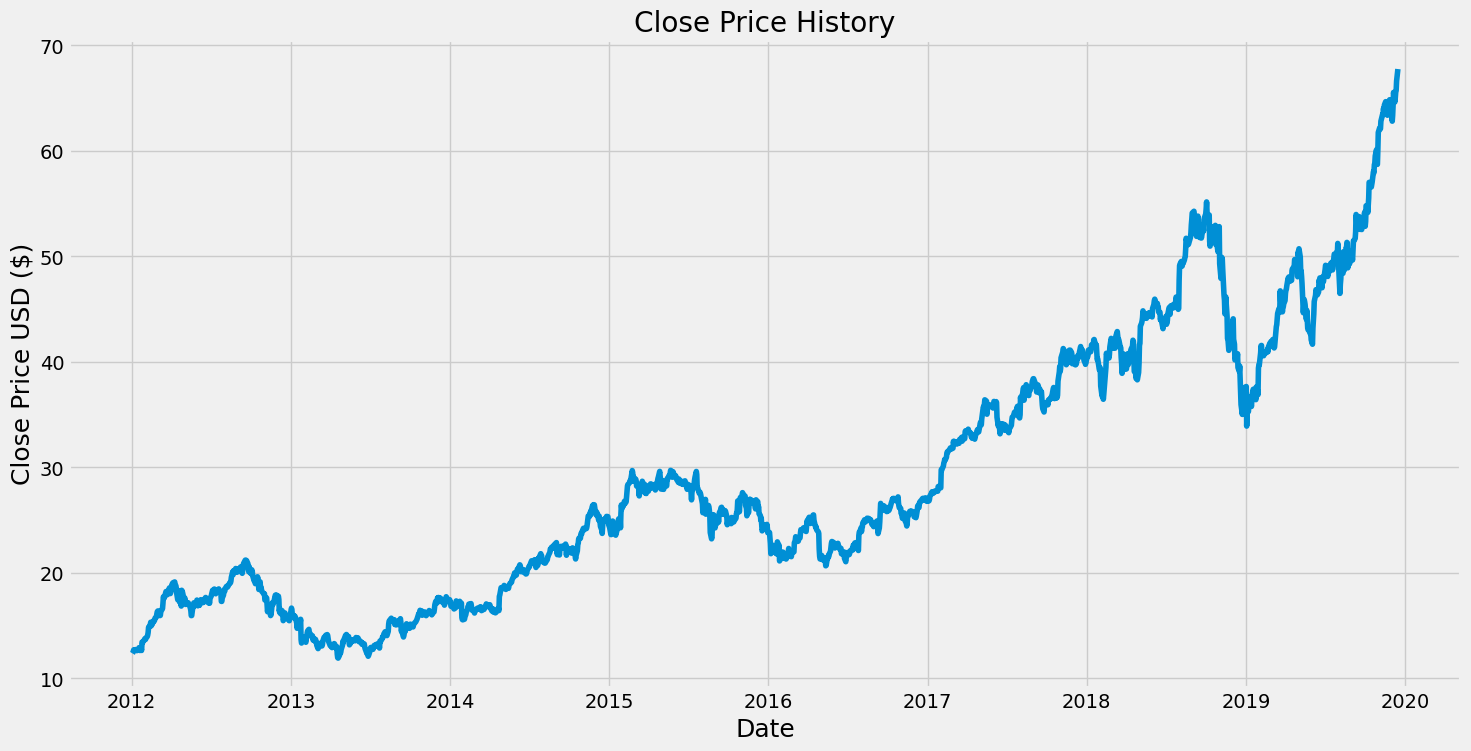

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1602

In [11]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Fetch stock data
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Ensure we use only 'Close' prices for scaling
dataset = df[['Close']].values

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5])  # Print first 5 scaled values


[*********************100%***********************]  1 of 1 completed

[[0.0080507 ]
 [0.00924194]
 [0.01171612]
 [0.01407167]
 [0.01371059]]


In [19]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
      print(x_train)
      print(y_train)
      print()

[array([0.0080507 , 0.00924194, 0.01171612, 0.01407167, 0.01371059,
       0.01452451, 0.01415254, 0.01352725, 0.01267567, 0.01531144,
       0.01768853, 0.01695548, 0.01293968, 0.01677217, 0.01299903,
       0.02714847, 0.02605424, 0.02748266, 0.03057125, 0.03244174,
       0.03228544, 0.0317087 , 0.03416669, 0.03647903, 0.03909879,
       0.04333017, 0.05221869, 0.05235336, 0.05730171, 0.06099945,
       0.05464432, 0.0570915 , 0.05704292, 0.06390483, 0.06292928,
       0.06473494, 0.06797974, 0.06978546, 0.07498713, 0.07877669,
       0.07987089, 0.08025349, 0.07377441, 0.07221118, 0.07244291,
       0.07853409, 0.08024809, 0.08392969, 0.09260803, 0.1041863 ,
       0.1020196 , 0.10202482, 0.11039596, 0.11301551, 0.11115061,
       0.10944723, 0.10767385, 0.11356534, 0.11760819, 0.11930071])]
[0.11511771673301857]

[array([0.0080507 , 0.00924194, 0.01171612, 0.01407167, 0.01371059,
       0.01452451, 0.01415254, 0.01352725, 0.01267567, 0.01531144,
       0.01768853, 0.01695548, 0.01

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [22]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - loss: 0.0028


In [25]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [29]:
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

2.54140157699585

Updated Valid Columns: MultiIndex([('Close', 'AAPL')],
           )


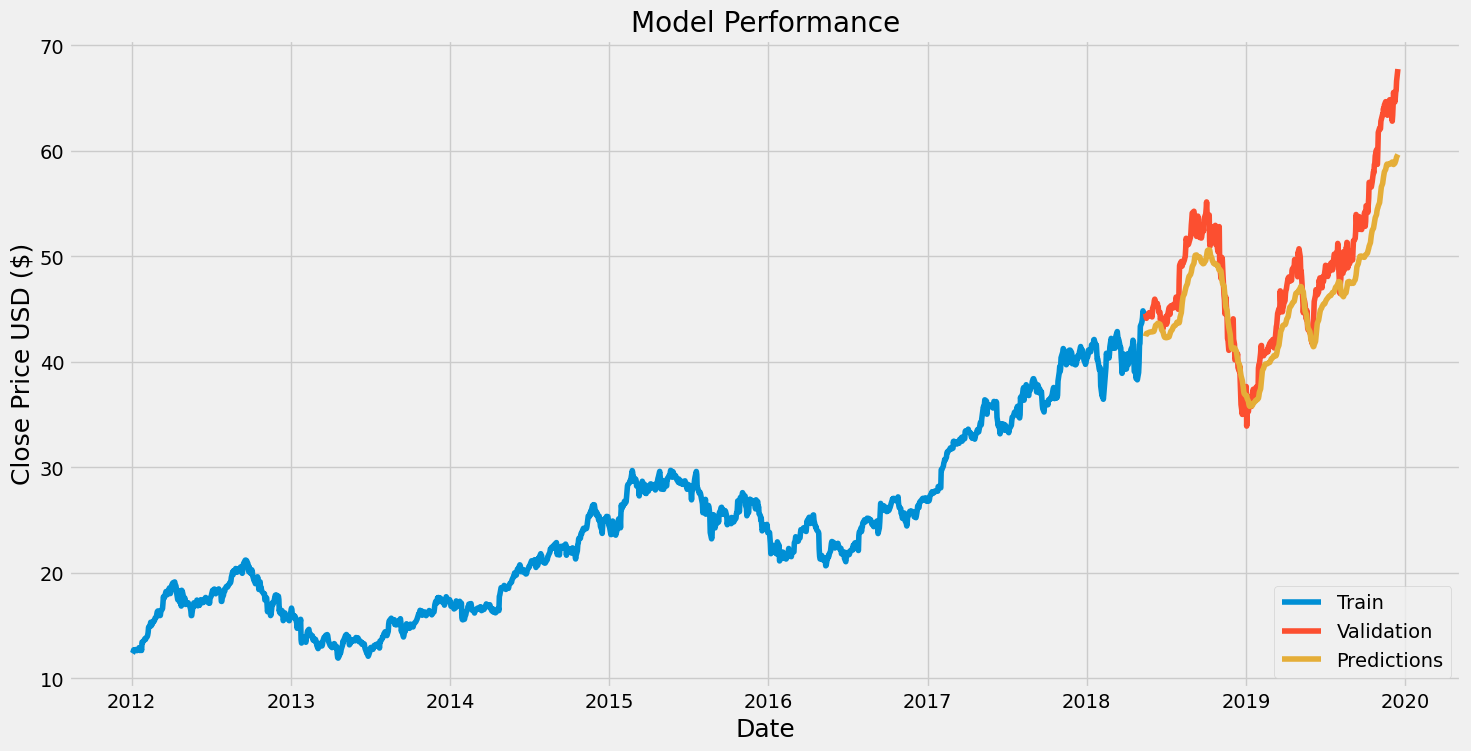

In [35]:
# Fix column reference in 'data'
data = df.loc[:, ('Close', 'AAPL')]  # Extract only AAPL Close prices
data = data.to_frame()  # Ensure it's a DataFrame

# Split train and validation sets
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Debugging: Print the actual structure
print("Updated Valid Columns:", valid.columns)

# Check if 'Close' column exists and properly assign predictions
if valid.shape[1] > 0:  # Ensure valid has data
    valid['Predictions'] = prediction

    # Plot the results
    plt.figure(figsize=(16,8))
    plt.title('Model Performance')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)

    plt.plot(train, label='Train')
    plt.plot(valid['Close'], label='Validation')
    plt.plot(valid['Predictions'], label='Predictions')

    plt.legend(loc='lower right')
    plt.show()
else:
    print("Error: 'Close' column still not found in dataset!")


In [36]:
valid

,Close,Predictions
,AAPL,
Date,,
2018-05-16,44.572422,42.422733
2018-05-17,44.290565,42.594379
2018-05-18,44.129498,42.695736
2018-05-21,44.442154,42.735985
2018-05-22,44.330837,42.764469
...,...,...
2019-12-10,65.000191,58.931713
2019-12-11,65.554596,59.056519


In [38]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load Apple stock data
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Select 'Close' price
new_df = apple_quote[['Close']]

# Ensure the last 60 days exist
last_60_days = new_df[-60:].values

# Check if last_60_days is empty
if last_60_days.shape[0] < 60:
    raise ValueError("Not enough data for the last 60 days.")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(new_df)  # Ensure scaler is fitted
last_60_days_scaled = scaler.transform(last_60_days)

# Reshape for model input
X_test = np.array([last_60_days_scaled])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict and inverse transform
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[60.010124]]


In [42]:
import yfinance as yf

# Fetch Apple stock data
apple_quote2 = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Print last few rows of the 'Close' column
print(apple_quote2['Close'].tail())


[*********************100%***********************]  1 of 1 completed

Ticker           AAPL
Date                 
2019-12-10  65.000191
2019-12-11  65.554596
2019-12-12  65.721687
2019-12-13  66.615028
2019-12-16  67.755333
